In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Data: https://www.kaggle.com/mlg-ulb/creditcardfraud

## 7.3 Feature engineering and preprocess data for input into the model

### Import the data

In [4]:
credit_df = pd.read_csv("./creditcard.csv")

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
credit_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Scale the features so as to mitigate the biasness towards one feature

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
X = credit_df.iloc[:,:-1]
Y = credit_df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=100, stratify=Y)

In [11]:
Y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [12]:
Y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [13]:
mmscale = MinMaxScaler()
mmscale.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train = mmscale.transform(X_train)

In [15]:
X_test = mmscale.transform(X_test)

### 7.4 Create the model and the optimizer

In [16]:
def get_model():
    model = Sequential()
    model.add(Dense(30,input_shape=(30,), activation='relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    return model

In [17]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# get the model
model = get_model()

# compile the model
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

W0313 08:05:37.825557 16400 deprecation.py:506] From C:\Users\aryan\.conda\envs\deeplearning\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0313 08:05:37.974159 16400 deprecation.py:323] From C:\Users\aryan\.conda\envs\deeplearning\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________
None


## 7.5 - Train the model

In [18]:
# fit the model
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=50, verbose=1,batch_size=1000)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, Y_test, verbose=0)

Train on 205060 samples, validate on 22785 samples
Epoch 1/50
205060/205060 [==============================] - 1s 3us/sample - loss: 0.2779 - acc: 0.9811 - f1_m: 0.0198 - precision_m: 0.0197 - recall_m: 0.0437 - val_loss: 0.0117 - val_acc: 0.9983 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
205060/205060 [==============================] - 0s 2us/sample - loss: 0.0113 - acc: 0.9983 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.0105 - val_acc: 0.9983 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/50
205060/205060 [==============================] - 0s 2us/sample - loss: 0.0098 - acc: 0.9983 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.0086 - val_acc: 0.9983 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/50
205060/205060 [==============================] - 0s 2us/sample - loss: 0.0079 - acc: 0

205060/205060 [==============================] - 0s 2us/sample - loss: 0.0032 - acc: 0.9993 - f1_m: 0.5894 - precision_m: 0.6459 - recall_m: 0.5783 - val_loss: 0.0035 - val_acc: 0.9994 - val_f1_m: 0.5789 - val_precision_m: 0.6304 - val_recall_m: 0.5580
Epoch 32/50
205060/205060 [==============================] - 0s 2us/sample - loss: 0.0033 - acc: 0.9993 - f1_m: 0.5987 - precision_m: 0.6448 - recall_m: 0.6019 - val_loss: 0.0035 - val_acc: 0.9994 - val_f1_m: 0.6612 - val_precision_m: 0.7355 - val_recall_m: 0.6304
Epoch 33/50
205060/205060 [==============================] - 0s 2us/sample - loss: 0.0033 - acc: 0.9993 - f1_m: 0.6192 - precision_m: 0.6693 - recall_m: 0.6074 - val_loss: 0.0035 - val_acc: 0.9994 - val_f1_m: 0.5242 - val_precision_m: 0.6159 - val_recall_m: 0.4913
Epoch 34/50
205060/205060 [==============================] - 0s 2us/sample - loss: 0.0032 - acc: 0.9993 - f1_m: 0.6340 - precision_m: 0.6863 - recall_m: 0.6281 - val_loss: 0.0034 - val_acc: 0.9995 - val_f1_m: 0.6687 -

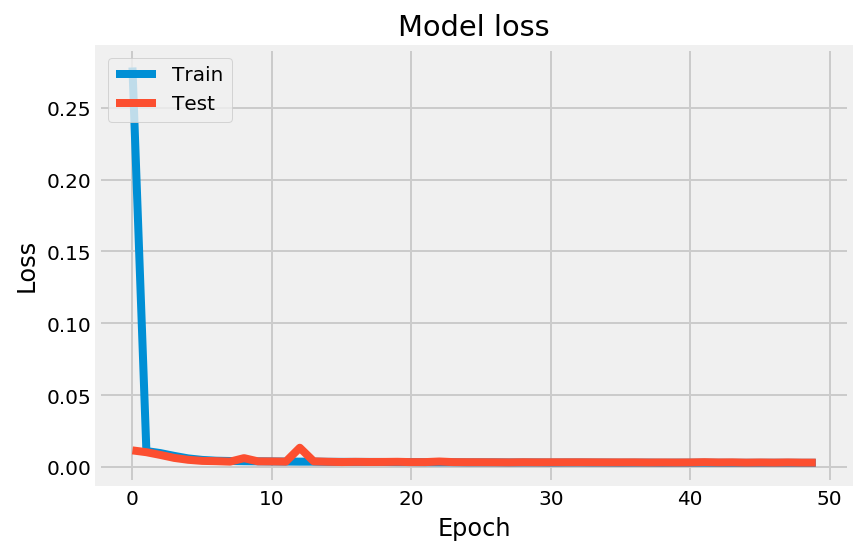

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [21]:
train_predictions_baseline = model.predict(X_train, batch_size=1000)
test_predictions_baseline = model.predict(X_test, batch_size=1000)

In [22]:
import sklearn
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve

Legitimate Transactions Detected (True Negatives):  56852
Legitimate Transactions Incorrectly Detected (False Positives):  12
Fraudulent Transactions Missed (False Negatives):  30
Fraudulent Transactions Detected (True Positives):  68
Total Fraudulent Transactions:  98


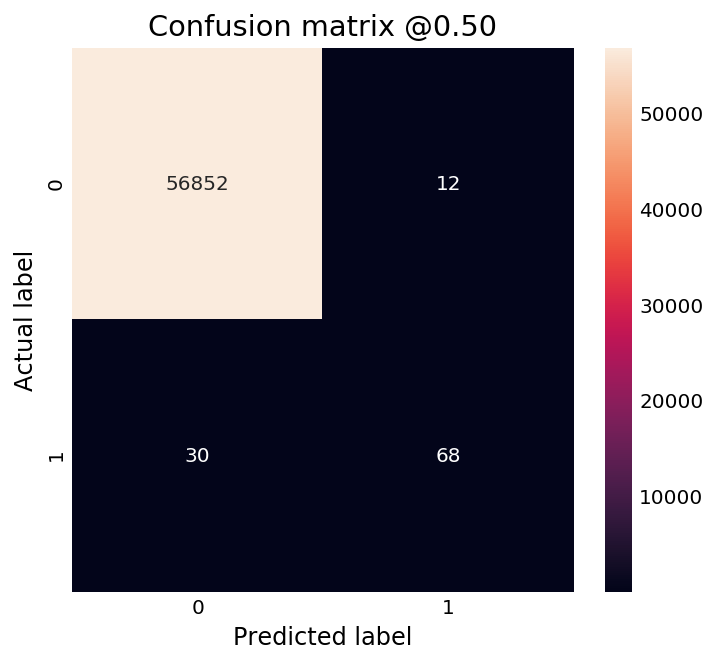

In [23]:
plot_cm(Y_test, test_predictions_baseline)

In [24]:
print(classification_report(Y_test,test_predictions_baseline>0.5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.69      0.76        98

    accuracy                           1.00     56962
   macro avg       0.92      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
print(roc_auc_score(Y_test,test_predictions_baseline>0.5))

0.8468332605974297


## 7.6 - Handling Class Imbalance

#### Increase class weight of positive instances

In [42]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
neg, pos = np.bincount(credit_df['Class'])
total = neg + pos
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [43]:
weighted_model = get_model()

# compile the model
weighted_model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = weighted_model.fit(X_train, Y_train, validation_split=0.1, epochs=50, verbose=1,batch_size=1000, class_weight=class_weight)

# evaluate the model
loss, accuracy, f1_score, precision, recall = weighted_model.evaluate(X_test, Y_test, verbose=0)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_9 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________
None
Train on 205060 samples, validate on 22785 samples
Epoch 1/50
205060/205060 [==============================] - ETA: 0s - loss: 0.5699 - acc: 0.7822 - f1_m: 0.1935 - precision_m: 0.1566 - recall_m: 0.7556       - 1s 3us/sample - loss: 0.5701 - ac

205060/205060 [==============================] - 0s 2us/sample - loss: 0.1769 - acc: 0.9747 - f1_m: 0.1841 - precision_m: 0.1173 - recall_m: 0.7584 - val_loss: 0.1893 - val_acc: 0.9642 - val_f1_m: 0.0738 - val_precision_m: 0.0393 - val_recall_m: 0.7246
Epoch 29/50
205060/205060 [==============================] - 0s 2us/sample - loss: 0.1694 - acc: 0.9726 - f1_m: 0.1836 - precision_m: 0.1169 - recall_m: 0.7364 - val_loss: 0.2082 - val_acc: 0.9942 - val_f1_m: 0.2918 - val_precision_m: 0.1930 - val_recall_m: 0.7039
Epoch 30/50
205060/205060 [==============================] - 0s 2us/sample - loss: 0.1701 - acc: 0.9750 - f1_m: 0.2099 - precision_m: 0.1390 - recall_m: 0.7388 - val_loss: 0.2258 - val_acc: 0.9957 - val_f1_m: 0.3914 - val_precision_m: 0.2946 - val_recall_m: 0.7283
Epoch 31/50
205060/205060 [==============================] - 0s 2us/sample - loss: 0.1671 - acc: 0.9742 - f1_m: 0.1901 - precision_m: 0.1258 - recall_m: 0.7362 - val_loss: 0.2343 - val_acc: 0.9962 - val_f1_m: 0.3538 -

## 7.7 - Evaluate the final model and predict fraud using the model

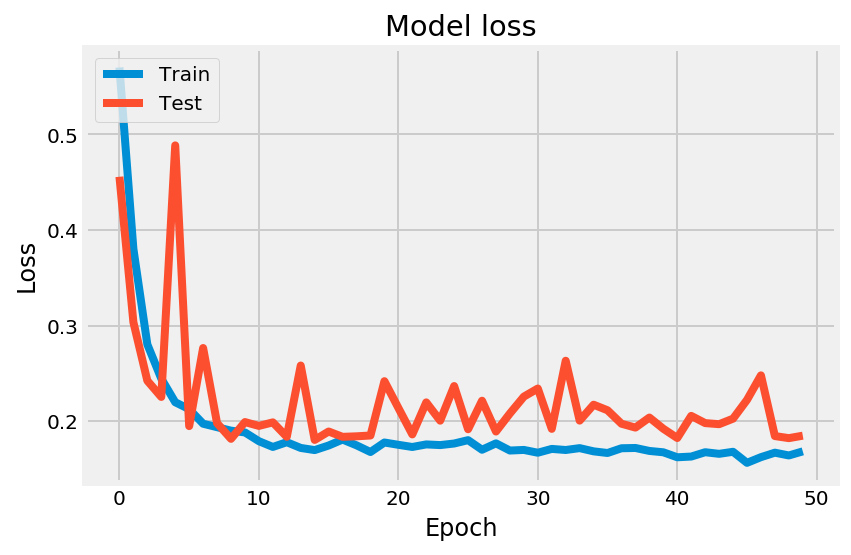

In [44]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [53]:
def find_optimal_cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    plt.plot(tpr)
    plt.plot(1-fpr, color = 'red')
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ax.set_xticklabels([])
    return list(roc_t['threshold']) 

In [54]:
test_predictions_weighted = weighted_model.predict(X_test, batch_size=1000)

[0.20962876081466675]

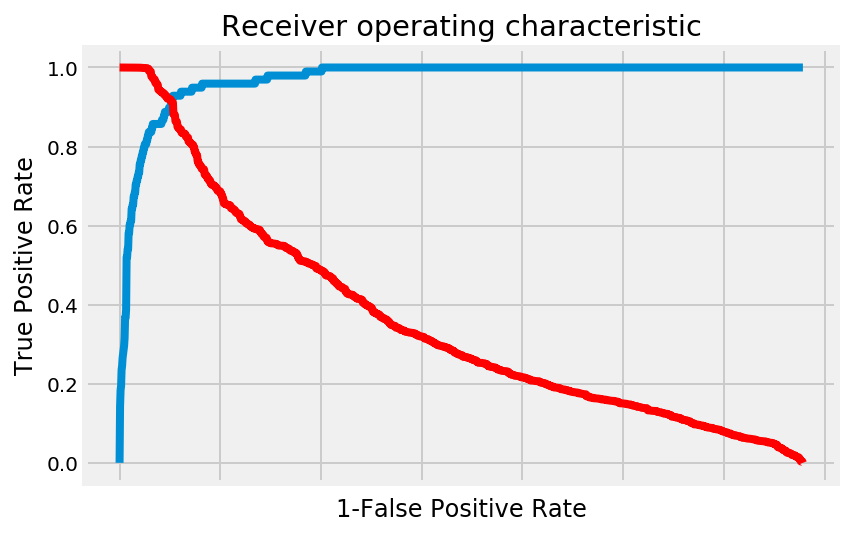

In [55]:
find_optimal_cutoff(Y_test, test_predictions_weighted)

Legitimate Transactions Detected (True Negatives):  51911
Legitimate Transactions Incorrectly Detected (False Positives):  4953
Fraudulent Transactions Missed (False Negatives):  9
Fraudulent Transactions Detected (True Positives):  89
Total Fraudulent Transactions:  98


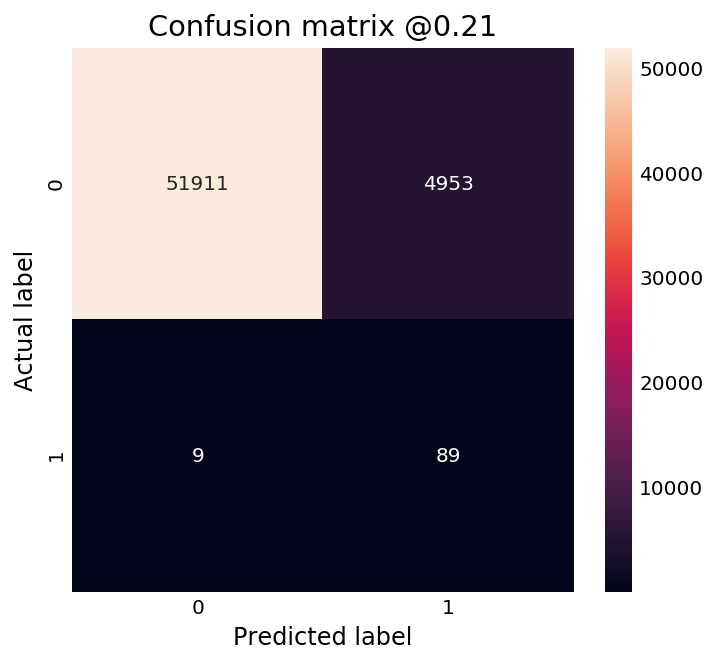

In [48]:
plot_cm(Y_test, test_predictions_weighted, p=0.21)

In [49]:
print(classification_report(Y_test, test_predictions_weighted>0.21))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.91      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [50]:
roc_auc_score(Y_test, test_predictions_weighted>0.21)

0.9105303524054529